# STA130 Course Project

> See [here](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F23_course_project_specification.ipynb) further details!!

The data we'll use for the Fall 2024 STA130 course project is based on the [Canadian Social Connection Survey](https://casch.org/cscs) (CSCS) run by [genwell](https://genwell.ca/) and the [Canadian Alliance for Social Connection and Health](https://casch.org/) (CASCH). This data is used to produce [Rapid Evidence Briefs](https://casch.org/publications) which scientifically analyze the importance of social connection and community engagement -- relationships with family, friends, coworkers, neighbours, and strangers -- for personal health and well-being. The purpose of our course project is to help raise awareness about and interest in this often under appreciated topic. To do so STA130 students will do "data blitz" to discover interesting information and identify key statistics hidden inside the CSCS data. The findings each project team produces will be shared with other UofT courses (in Digital Humanities, Writing, Sociology, etc.) and other genwell and CASCH associated teams specializing in communications and media relations, and they will transform the most interesting findings of our teams into content for social media campaigns. If our findings are important enough, they may even form the basis of future Rapid Evidence Briefs...

> In conjuction with this project, we are taking part in a reserach project "investigating the impact of community engaged learning on student happiness, satisfaction, and well-being" (alongside multiple courses in Pharmacology and Toxicology, Human Biology, and Psychology). We are curious to know if you find this project altruistic, and how this in turn might influece your own experience in the course, and beyond.

To use this data ethically, professionally, and appropriately we must take a quick look and abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf). You should also take a quick look at the [list of available variables](https://drive.google.com/file/d/1ISVymGn-WR1lcRs4psIym2N3or5onNBi/view) and then check out the [data](https://drive.google.com/file/d/1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo/view) itself (available at the bottom of the [CSCS](https://casch.org/cscs) webpage).


Variables: 
PSYCH_zimet_multidimensional_social_support_scale_family_helps - My family really tries to help me
PSYCH_zimet_multidimensional_social_support_scale_family_emotional - I get the emotional help and support I need from my family
PSYCH_zimet_multidimensional_social_support_scale_problems_family - I can talk about my problems with my family

PSYCH_zimet_multidimensional_social_support_scale_help - My friends really try to help me.
PSYCH_zimet_multidimensional_social_support_scale_go_wrong - I can count on my friends when things go wrong
PSYCH_zimet_multidimensional_social_support_scale_problems_friends - I can talk about my problems with my friends

PSYCH_zimet_multidimensional_social_support_scale_sorrows - I have friends or family members with whom I can share my joys and sorrows
PSYCH_zimet_multidimensional_social_support_scale_decisions - My friends and family are willing to help me make decisions

In [1]:
import pandas as pd
#Data set
url_col = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv"
url_data = "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv"

cols = pd.read_csv(url_col)
data = pd.read_csv(url_data, na_values=["9999", "", " ", "Presented but no response", "NA"])

empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

data.shape

/tmp/ipykernel_104/1808008904.py:7: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url_data, na_values=["9999", "", " ", "Presented but no response", "NA"])


(11431, 1779)

In [2]:
#Focused Data set
# Specify the variables to keep
variables_to_keep = ["PSYCH_zimet_multidimensional_social_support_scale_family_helps",
    "PSYCH_zimet_multidimensional_social_support_scale_family_emotional",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_family",
    "PSYCH_zimet_multidimensional_social_support_scale_help",
    "PSYCH_zimet_multidimensional_social_support_scale_go_wrong",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_friends",
    "PSYCH_zimet_multidimensional_social_support_scale_sorrows",
    "PSYCH_zimet_multidimensional_social_support_scale_decisions"
]

# Filter the dataset for the specified variables
new_data = dataV2_cohortV3[variables_to_keep].copy()
new_data_cleaned = new_data.fillna(0)  # Replace NaN with 0


# Display the selected data
pd.set_option('display.max_columns', len(variables_to_keep))
new_data_cleaned


,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_decisions
19,Very Strongly Agree,Very Strongly Agree,Agree,Strongly Agree,Neither Agree Nor Disagree,Agree,Strongly Agree,Neither Agree Nor Disagree
21,Very Strongly Agree,Very Strongly Agree,Strongly Agree,Very Strongly Agree,Very Strongly Agree,Strongly Agree,Very Strongly Agree,Strongly Agree
71,Very Strongly Agree,Agree,Agree,Very Strongly Agree,Very Strongly Agree,Strongly Agree,Strongly Agree,Very Strongly Agree
77,Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Strongly Agree,Agree,Agree,Agree
78,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,Neither Agree Nor Disagree,Strongly Agree,Agree,Strongly Agree,Agree
...,...,...,...,...,...,...,...,...
11379,Very Strongly Disagree,Very Strongly Disagree,Very Strongly Disagree,Agree,Neither Agree Nor Disagree,Agree,Agree,Neither Agree Nor Disagree
11380,Very Strongly Disagree,Very Strongly Disagree,Very Strongly Disagree,Strongly Agree,Agree,Agree,Strongly Agree,Neither Agree Nor Disagree
11412,Very Strongly Agree,Strongly Agree,Agree,Agree,Neither Agree Nor Disagree,Strongly Disagree,Agree,Agree
11428,Disagree,Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,Neither Agree Nor Disagree,Disagree


In [3]:
# Here's a high level summary of the data
for col in new_data_cleaned.columns:
    col_summary = new_data_cleaned[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, new_data_cleaned[col].shape, "\n")

PSYCH_zimet_multidimensional_social_support_scale_family_helps
Agree                         182
Very Strongly Agree           171
Neither Agree Nor Disagree    155
Strongly Agree                120
Disagree                       94
Very Strongly Disagree         48
0                              42
Strongly Disagree              38
Name: count, dtype: int64 

PSYCH_zimet_multidimensional_social_support_scale_family_emotional
Agree                         192
Neither Agree Nor Disagree    155
Disagree                      130
Very Strongly Agree           118
Strongly Agree                103
Very Strongly Disagree         65
Strongly Disagree              44
0                              43
Name: count, dtype: int64 

PSYCH_zimet_multidimensional_social_support_scale_problems_family
Agree                         204
Neither Agree Nor Disagree    132
Disagree                      123
Strongly Agree                114
Very Strongly Agree           102
Very Strongly Disagree         68


In [4]:
scale_map = {
    'Very Strongly Disagree': -3.0,
    'Strongly Disagree': 2.0,
    'Disagree': -1.0,
    'Neither Agree Nor Disagree': 0.0,
    'Agree': 1.0,
    'Strongly Agree': 2.0,
    'Very Strongly Agree': 3.0,
}

# Clean the data for mapping
for col in new_data_cleaned.columns:
    new_data_cleaned[col] = new_data_cleaned[col].astype(str).str.strip()  # Remove leading/trailing spaces

# Apply the scale map safely
new_data_cleaned_mapped = new_data_cleaned.replace(scale_map)

# Replace any unmapped values with 0 (or another fallback value, if desired)
new_data_cleaned_mapped = new_data_cleaned_mapped.fillna(0)

#Convert to float
final_data = new_data_cleaned_mapped.astype(float)
# Display the mapped data
final_data


,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_decisions
19,3.0,3.0,1.0,2.0,0.0,1.0,2.0,0.0
21,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0
71,3.0,1.0,1.0,3.0,3.0,2.0,2.0,3.0
77,-1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0
78,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
11379,-3.0,-3.0,-3.0,1.0,0.0,1.0,1.0,0.0
11380,-3.0,-3.0,-3.0,2.0,1.0,1.0,2.0,0.0
11412,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0
11428,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0


In [5]:
import pandas as pd

# Define the scale map
scale_map = {
    'Very Strongly Disagree': -3.0,
    'Strongly Disagree': -2.0,
    'Disagree': -1.0,
    'Neither Agree Nor Disagree': 0.0,
    'Agree': 1.0,
    'Strongly Agree': 2.0,
    'Very Strongly Agree': 3.0,
}

# Column classification
family_columns = [
    "PSYCH_zimet_multidimensional_social_support_scale_family_helps",
    "PSYCH_zimet_multidimensional_social_support_scale_family_emotional",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_family"
]

friends_columns = [
    "PSYCH_zimet_multidimensional_social_support_scale_help",
    "PSYCH_zimet_multidimensional_social_support_scale_go_wrong",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_friends"
]

both_columns = [
    "PSYCH_zimet_multidimensional_social_support_scale_family_helps",
    "PSYCH_zimet_multidimensional_social_support_scale_family_emotional",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_family",
    "PSYCH_zimet_multidimensional_social_support_scale_help",
    "PSYCH_zimet_multidimensional_social_support_scale_go_wrong",
    "PSYCH_zimet_multidimensional_social_support_scale_problems_friends",
    "PSYCH_zimet_multidimensional_social_support_scale_sorrows",
    "PSYCH_zimet_multidimensional_social_support_scale_decisions"
]

# Clean and map the data
new_data_cleaned = new_data_cleaned.map(lambda x: scale_map.get(x.strip(), x) if isinstance(x, str) else x)

# Calculate individual mean scores
family_data = new_data_cleaned[family_columns].astype(float)
family_data['family_mean'] = family_data.mean(axis=1)

friends_data = new_data_cleaned[friends_columns].astype(float)
friends_data['friends_mean'] = friends_data.mean(axis=1)

both_data = new_data_cleaned[both_columns].astype(float)
both_data['both_mean'] = both_data.mean(axis=1)

# Combine all individual scores into a new dataset
combined_individual_data = pd.concat([family_data, friends_data, both_data], axis=1)
combined_individual_data



,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_problems_family,family_mean,...,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_decisions,both_mean
19,3.0,3.0,1.0,2.333333,...,1.0,2.0,0.0,1.500
21,3.0,3.0,2.0,2.666667,...,2.0,3.0,2.0,2.625
71,3.0,1.0,1.0,1.666667,...,2.0,2.0,3.0,2.250
77,-1.0,0.0,0.0,-0.333333,...,1.0,1.0,1.0,0.500
78,0.0,0.0,1.0,0.333333,...,1.0,2.0,1.0,0.875
...,...,...,...,...,...,...,...,...,...
11379,-3.0,-3.0,-3.0,-3.000000,...,1.0,1.0,0.0,-0.750
11380,-3.0,-3.0,-3.0,-3.000000,...,1.0,2.0,0.0,-0.375
11412,3.0,2.0,1.0,2.000000,...,-2.0,1.0,1.0,0.875
11428,-1.0,-1.0,0.0,-0.666667,...,1.0,0.0,-1.0,-0.250


In [18]:
# Calculate the mean for each column
column_means = combined_individual_data.mean()

# Display the column means
print("Column Means:\n", column_means)


Column Means:
 PSYCH_zimet_multidimensional_social_support_scale_family_helps        0.730588
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    0.398824
PSYCH_zimet_multidimensional_social_support_scale_problems_family     0.332941
family_mean                                                           0.487451
PSYCH_zimet_multidimensional_social_support_scale_help                0.671765
PSYCH_zimet_multidimensional_social_support_scale_go_wrong            0.743529
PSYCH_zimet_multidimensional_social_support_scale_problems_friends    0.863529
friends_mean                                                          0.759608
PSYCH_zimet_multidimensional_social_support_scale_family_helps        0.730588
PSYCH_zimet_multidimensional_social_support_scale_family_emotional    0.398824
PSYCH_zimet_multidimensional_social_support_scale_problems_family     0.332941
PSYCH_zimet_multidimensional_social_support_scale_help                0.671765
PSYCH_zimet_multidimensional_social_s

In [33]:
# Descriptive statistics for each group
combined_individual_stats = combined_individual_data.agg(['mean', 'median', 'std'])

print(" Descriptive Statistics:\n", combined_individual_stats)

 Descriptive Statistics:
         PSYCH_zimet_multidimensional_social_support_scale_family_helps  \
mean                                             0.730588                
median                                           1.000000                
std                                              1.690166                

        PSYCH_zimet_multidimensional_social_support_scale_family_emotional  \
mean                                             0.398824                    
median                                           0.000000                    
std                                              1.688944                    

        PSYCH_zimet_multidimensional_social_support_scale_problems_family  \
mean                                             0.332941                   
median                                           0.000000                   
std                                              1.707317                   

        family_mean  ...  \
mean       0.487451  ...   

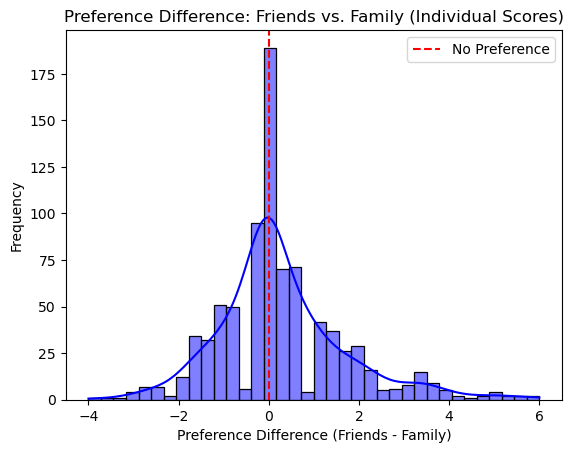


One-Sample t-test for Preference Difference (Individual Scores):
T-Statistic: 5.549733191025878
P-Value: 3.824894970655147e-08


In [25]:
# Calculate preference difference (Friends - Family) for each individual
new_data_cleaned['preference_difference'] = individual_friends_mean - individual_family_mean

# Visualize the distribution of preference differences
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(new_data_cleaned['preference_difference'], kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--', label='No Preference')
plt.title("Preference Difference: Friends vs. Family (Individual Scores)")
plt.xlabel("Preference Difference (Friends - Family)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Perform a one-sample t-test to check if the mean preference difference is significantly different from 0
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(new_data_cleaned['preference_difference'], 0)

print("\nOne-Sample t-test for Preference Difference (Individual Scores):")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


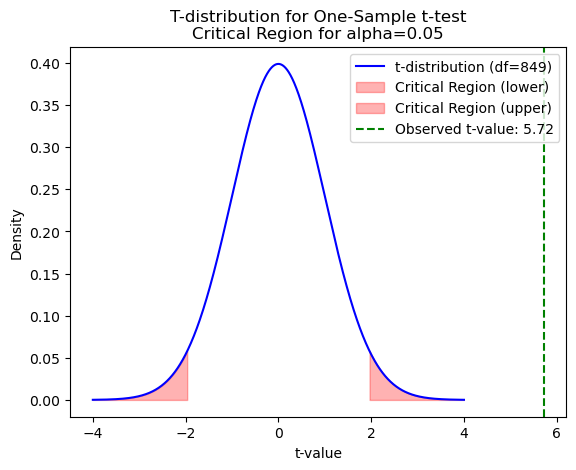

In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Degrees of freedom (df) based on your dataset
df = len(individual_friends_mean) - 1

# The t-statistic calculated from the one-sample t-test 
t_stat = 5.72  

# Calculate the critical t-values for a two-tailed test at alpha = 0.05
alpha = 0.05
critical_t_upper = stats.t.ppf(1 - alpha/2, df)  # Upper tail
critical_t_lower = stats.t.ppf(alpha/2, df)      # Lower tail

# Plot the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)
plt.plot(x, y, label=f't-distribution (df={df})', color='blue')

# Mark the critical regions (red)
plt.fill_between(x, y, where=(x <= critical_t_lower), color='red', alpha=0.3, label=f'Critical Region (lower)')
plt.fill_between(x, y, where=(x >= critical_t_upper), color='red', alpha=0.3, label=f'Critical Region (upper)')

# Mark the observed t-statistic (green line)
plt.axvline(x=t_stat, color='green', linestyle='--', label=f'Observed t-value: {t_stat:.2f}')

# Title and labels
plt.title(f'T-distribution for One-Sample t-test\nCritical Region for alpha={alpha}')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
